# <u>Fashion-mnist</u>
* ### The purpose of this notebook is to classify between types of clothing, using the most compact model and without the use of neural networks.
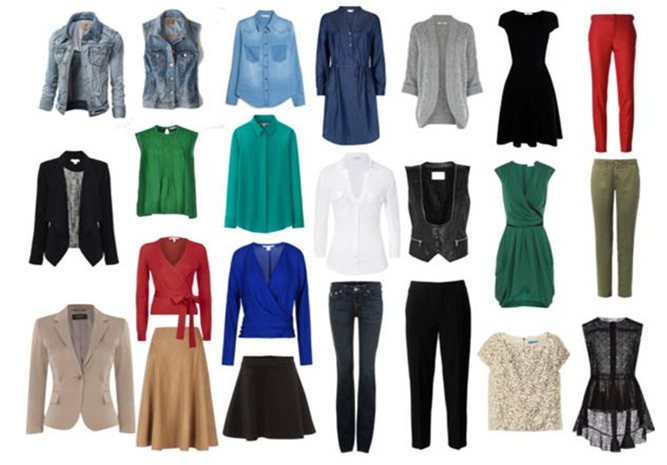

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [2]:
#Loading dataset
data_test = pd.read_csv(r'C:\Users\Aviva\Desktop\fashion-mnist_test.csv')
data_train = pd.read_csv(r'C:\Users\Aviva\Desktop\fashion-mnist_train.csv')
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("Train dataset shape:{}".format(data_train.shape))
print("Test dataset shape:{}".format(data_test.shape))

Train dataset shape:(60000, 785)
Test dataset shape:(10000, 785)


In [4]:
SAMPLE_INDEX = 1 #The index of the image to show

In [5]:
#We can see that there are no null values
data_train.isnull().sum().sum()

0

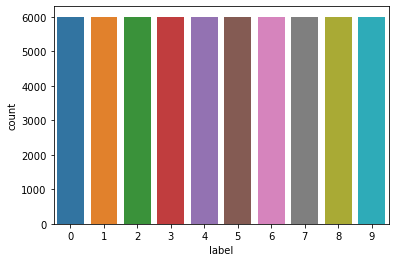

In [6]:
# We can see that the data contains a balanced amount of each item
sns.countplot(x='label', data=data_train)

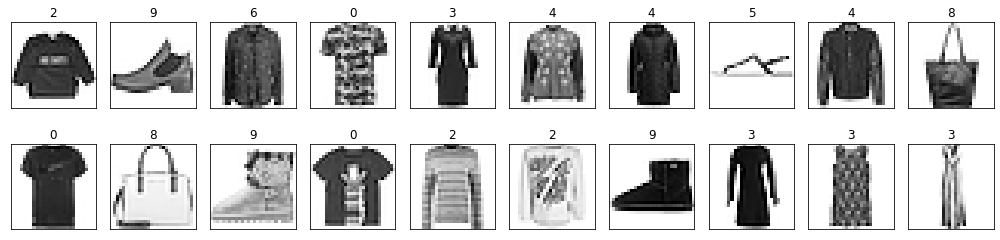

In [7]:
# plot some of the images
plt.figure(figsize=(14, 12))

for i in range(0,20):
    splt = plt.subplot(7, 10, i+1)
    plt.imshow(data_train.iloc[:, 1:].values[i].reshape(28, 28), cmap="Greys")
    plt.title("{}".format(data_train.iloc[:, 0].values[i]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

# Pre-processing
##### - We will divide the data into X_train and y_train
##### - We will scale the data
##### - We will look for the ideal dimension reduction and perform PCA

In [8]:
#------------Separate feature data and target data of the data train--------------
y_train = data_train['label']
X_train = data_train.drop("label",axis=1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']

In [10]:
#Normalize features:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_train_sc

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

* #### We will now reduce the dimensions and see how this affects the data.
* #### We want to reduce as many dimensions as possible but maintain a sufficient amount in order to identify the difference between the types of clothing

(60000, 420)

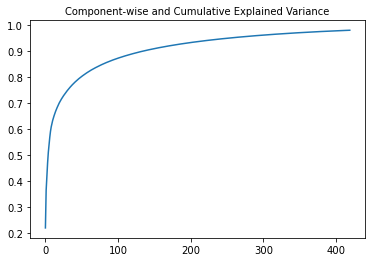

In [11]:
# perform PCA and keep 420 components:

pca = PCA(n_components = 420, random_state=42)
X_reduced_420 = pca.fit_transform(X_train_sc)

#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(420), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

#Invert the PCA to obtain the image with the new components:
inv_420 = pca.inverse_transform(X_reduced_420[SAMPLE_INDEX, :])
inv_420 = scaler.inverse_transform(inv_420) #Unnormalize

X_reduced_420.shape

* ### It can be seen that even 200 dimensions are enough to get a pretty good understanding of the data

In [12]:
pca = PCA(n_components = 200, random_state=42)
X_reduced_200 = pca.fit_transform(X_train_sc)

#Invert the PCA to obtain the image with the new components:
inv_200 = pca.inverse_transform(X_reduced_200[SAMPLE_INDEX, :])
inv_200 = scaler.inverse_transform(inv_200) #Unnormalize

X_reduced_200.shape

(60000, 200)

* We will also take an example of a reduction to 120 dimensions:

In [13]:
pca = PCA(n_components = 120, random_state=42)
X_reduced = pca.fit_transform(X_train_sc)

#Invert the PCA to obtain the image with the new components:
inv_120 = pca.inverse_transform(X_reduced[SAMPLE_INDEX, :])
inv_120 = scaler.inverse_transform(inv_120) #Unnormalize

X_reduced.shape

(60000, 120)

* ### Let's now inverse transform the data to view how the data changes because of the PCA:

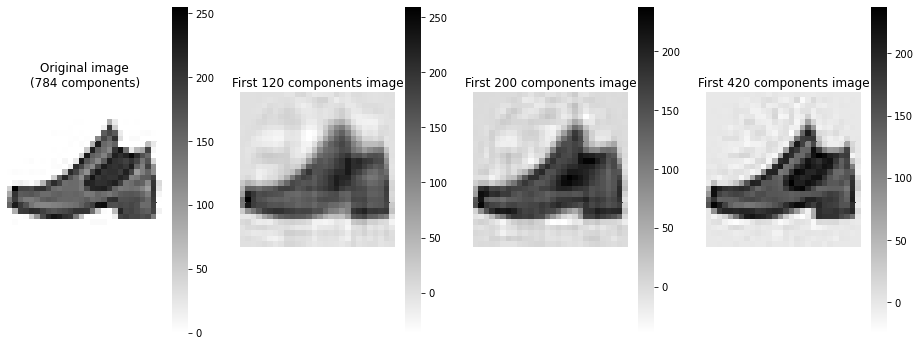

In [14]:
#Plot images:
fig, axarr = plt.subplots(1, 4, figsize=(16, 6))
sns.heatmap(X_train.iloc[SAMPLE_INDEX, :, ].values.reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_120.reshape(28, 28), cmap='gray_r', ax=axarr[1])
sns.heatmap(inv_200.reshape(28, 28), cmap='gray_r', ax=axarr[2])
sns.heatmap(inv_420.reshape(28, 28), cmap='gray_r', ax=axarr[3])


axarr[0].set_title("Original image\n({} components)".format(X_train.shape[1]), fontsize=12)
axarr[1].set_title("First {} components image".format(120), fontsize=12)
axarr[2].set_title("First {} components image".format(200), fontsize=12)
axarr[3].set_title("First {} components image".format(420), fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')
axarr[2].set_aspect('equal')
axarr[3].set_aspect('equal')
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[3].axis('off')


plt.show()

# Training a model

### Logistic Regression
* #### We now want to understand whether or not the reduction of the dimension we did significantly harmed the data prediction 
* #### So let's try Logistic Regression with PCA of 120 components and compare it to Logistic Regression with PSA of 420 components and to Logistic Regression PCA with a retained variance of 0.95

In [16]:
#---------------Logistic Regression with PCA-----------------------
num_components = [120, 187, 420]
accuracy_LG = []

for RV in num_components:
    pipe_LG_PCA = Pipeline([
         ("pca", PCA(n_components=RV, random_state=42)),
        ("scale", StandardScaler()),
        ('lg_clf', LogisticRegression(multi_class='ovr',max_iter=100000))
    ])

    y_pred_LG_PCA = cross_val_predict(pipe_LG_PCA, X_train, y_train)
    #save the accuracy
    accuracy = accuracy_score(y_train,y_pred_LG_PCA)
    accuracy_LG.append(accuracy)

Text(0.5, 1.0, 'The number of dimensions in relation to the accuracy we obtained on Logistic Regression')

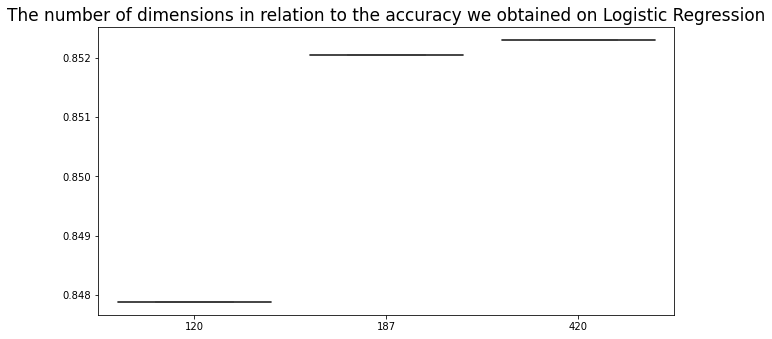

In [24]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
x = num_components
y = accuracy_LG
sns.boxplot(x=x, y=y)
plt.title("The number of dimensions in relation to the accuracy we obtained on Logistic Regression", fontsize=17, fontweight=100)

* ### It can be deduced from the graph that clearly we do not need all the first 420 dimensions.
* ### In addition, it can be concluded that even with 120 dimensions which is only 64% of the 187 first dimensions of the data, it is possible to reach a pretty good result and not so far from the result we reached when we used all the first 187 dimensions.
* ### So since our assignment was to build an accurate model but use as few dimensions as possible, because a more compact model is a better model, I chose to use only the first 120 dimensions.

### Random Forest Classifier

In [72]:
#---------------Random Forest Classifier with PCA of retained variance of 0.95 i.e. 187 components in this case----------------

pipe_RF_PCA_095 = Pipeline([
     ("pca", PCA(n_components=187, random_state=42)),
    ("scale", StandardScaler()),
    ('rf_clf', RandomForestClassifier())
])

y_pred_RF_PCA_095 = cross_val_predict(pipe_RF_PCA_095, X_train, y_train)

print(classification_report(y_train, y_pred_RF_PCA_095,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_RF_PCA_095 = accuracy_score(y_train,y_pred_RF_PCA_095)

              precision    recall  f1-score   support

 T-shirt/top     0.7927    0.8553    0.8228      6000
     Trouser     0.9951    0.9555    0.9749      6000
    Pullover     0.7694    0.8017    0.7852      6000
       Dress     0.8585    0.8957    0.8767      6000
        Coat     0.7663    0.8077    0.7864      6000
      Sandal     0.9214    0.9302    0.9258      6000
       Shirt     0.7168    0.5618    0.6299      6000
     Sneaker     0.9247    0.9133    0.9190      6000
         Bag     0.9328    0.9480    0.9403      6000
  Ankle boot     0.9235    0.9458    0.9345      6000

    accuracy                         0.8615     60000
   macro avg     0.8601    0.8615    0.8596     60000
weighted avg     0.8601    0.8615    0.8596     60000



In [68]:
#---------------------Random Forest Classifier with PCA of 120 components------------------------

pipe_RF_PCA = Pipeline([
     ("pca", PCA(n_components=120, random_state=42)),
    ("scale", StandardScaler()),
    ('rf_clf', RandomForestClassifier())
])

y_pred_RF_PCA = cross_val_predict(pipe_RF_PCA, X_train, y_train)

print(classification_report(y_train, y_pred_RF_PCA,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_RF_PCA = accuracy_score(y_train,y_pred_RF_PCA)

              precision    recall  f1-score   support

 T-shirt/top     0.7974    0.8565    0.8259      6000
     Trouser     0.9933    0.9567    0.9746      6000
    Pullover     0.7754    0.8085    0.7916      6000
       Dress     0.8623    0.8958    0.8788      6000
        Coat     0.7710    0.8087    0.7894      6000
      Sandal     0.9263    0.9348    0.9306      6000
       Shirt     0.7175    0.5712    0.6360      6000
     Sneaker     0.9268    0.9197    0.9232      6000
         Bag     0.9396    0.9548    0.9472      6000
  Ankle boot     0.9306    0.9480    0.9392      6000

    accuracy                         0.8655     60000
   macro avg     0.8640    0.8655    0.8636     60000
weighted avg     0.8640    0.8655    0.8636     60000



<function matplotlib.pyplot.show(*args, **kw)>

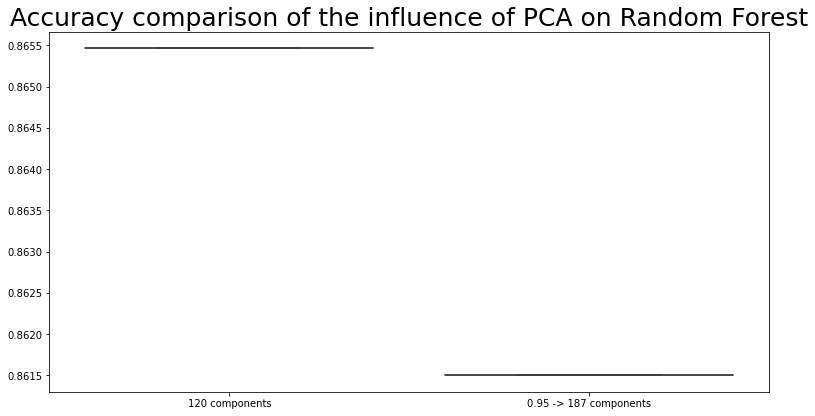

In [160]:
Models = ["120 components","0.95 -> 187 components"]
Accuracy = [accuracy_RF_PCA,accuracy_RF_PCA_095]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = Accuracy
sns.boxplot(x=x, y=y)
plt.title("Accuracy comparison of the influence of PCA on Random Forest",fontsize=25)
plt.show

* ### It can be clearly seen that our choice, to use the first 120 dimensions rather than the first 187 dimensions, was a good choice

### K-Neighbors Classifier 
* #### We will now find the ideal 'n' for 'n_neighbors'

In [35]:
#---------------KNN Classifier----------------
accuracy_knn = []

for n in [2,4,5,6,7]:
    pipe_KNN_PCA = Pipeline([
        ("pca", PCA(n_components=120, random_state=42)),
        ("scale", StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=n))
    ])

    y_pred_KNN_PCA = cross_val_predict(pipe_KNN_PCA, X_train, y_train, cv=3, n_jobs=-1)

    
    #save the accuracy
    accuracy = accuracy_score(y_train, y_pred_KNN_PCA)
    accuracy_knn.append(accuracy)

Text(0.5, 1.0, "The number of 'n_neighbors' in relation to the accuracy we obtained on KNN classifier")

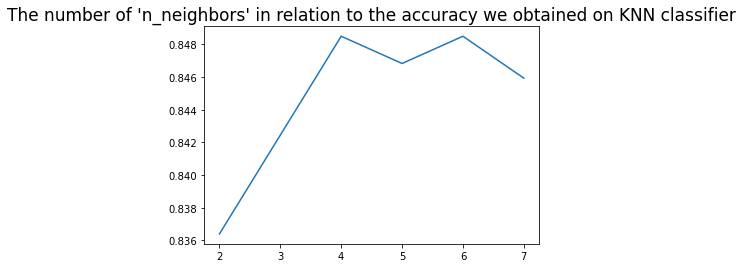

In [36]:
ax = plt.axes()
X = [2,4,5,6,7]
ax.plot(X, accuracy_knn)
plt.title("The number of 'n_neighbors' in relation to the accuracy we obtained on KNN classifier", fontsize=17, fontweight=100)

* ### The best n for 'n_neighbors' is n=4, it's accuracy = 0.8485

# xgboost classifier

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
pipe_XGB_PCA = Pipeline([
     ("pca", PCA(n_components=120, random_state=42)),
    ("scale", StandardScaler()),
    ('xgb', XGBClassifier(n_estimators=300, seed=0, eval_metric='mlogloss'))
])

y_pred_XGB_PCA = cross_val_predict(pipe_XGB_PCA, X_train, y_train, cv=3, n_jobs=-1)

print(classification_report(y_train, y_pred_XGB_PCA,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_XGB_PCA = accuracy_score(y_train,y_pred_XGB_PCA)

              precision    recall  f1-score   support

 T-shirt/top     0.8316    0.8620    0.8466      6000
     Trouser     0.9898    0.9683    0.9789      6000
    Pullover     0.8115    0.8175    0.8145      6000
       Dress     0.8865    0.9052    0.8958      6000
        Coat     0.8045    0.8272    0.8157      6000
      Sandal     0.9636    0.9525    0.9580      6000
       Shirt     0.7354    0.6768    0.7049      6000
     Sneaker     0.9412    0.9452    0.9432      6000
         Bag     0.9595    0.9628    0.9612      6000
  Ankle boot     0.9491    0.9607    0.9549      6000

    accuracy                         0.8878     60000
   macro avg     0.8873    0.8878    0.8874     60000
weighted avg     0.8873    0.8878    0.8874     60000



## We will now perform an ensemble model and try to create a better model:
### Voting Classifier

In [60]:
#-------- Voting Classifier with XGB ---------
pipe_VOT = Pipeline([
     ("pca", PCA(n_components=120, random_state=42)),
    ("scale", StandardScaler()),
     ('voting_clf', VotingClassifier(
        estimators=[
            ('lg', LogisticRegression(multi_class='ovr',max_iter=100000)),
            ('rf', RandomForestClassifier()),
            ('xgb', XGBClassifier(n_estimators=300, seed=0, eval_metric='mlogloss')),
             ('knn', KNeighborsClassifier())
        ], voting='soft', n_jobs=-1))
])

y_pred_VOT = cross_val_predict(pipe_VOT, X_train, y_train, cv=3, n_jobs=-1)

print(classification_report(y_train, y_pred_VOT,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_VOT = accuracy_score(y_train,y_pred_VOT)

              precision    recall  f1-score   support

 T-shirt/top     0.8232    0.8735    0.8476      6000
     Trouser     0.9930    0.9708    0.9818      6000
    Pullover     0.8082    0.8118    0.8100      6000
       Dress     0.8924    0.9080    0.9001      6000
        Coat     0.8050    0.8252    0.8150      6000
      Sandal     0.9729    0.9465    0.9595      6000
       Shirt     0.7265    0.6618    0.6927      6000
     Sneaker     0.9357    0.9537    0.9446      6000
         Bag     0.9638    0.9640    0.9639      6000
  Ankle boot     0.9514    0.9618    0.9566      6000

    accuracy                         0.8877     60000
   macro avg     0.8872    0.8877    0.8872     60000
weighted avg     0.8872    0.8877    0.8872     60000



# Using K-MEANS
* ### I did a search using GridSearchCV of the optimal 'n_clusters'
* ### 'n_clusters' Are the number of clusters to form as well as the number of centroids to generate.

In [16]:
param_grid = dict(kmeans__n_clusters=range(2, 20))
grid_clf = GridSearchCV(pipe_VOT_KMEANS, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total= 1.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  50.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  44.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total= 1.3min
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total= 1.2min
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total= 1.0min
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total= 1.1min
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total= 1.6min
[CV] k

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 122.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=120, random_state=42)),
                                       ('scale', StandardScaler()),
                                       ('kmeans', KMeans(n_clusters=50)),
                                       ('voting_clf',
                                        VotingClassifier(estimators=[('lg',
                                                                      LogisticRegression(max_iter=100000,
                                                                                         multi_class='ovr')),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('knn',
                                                                      KNeighborsClassifier())],
                   

In [28]:
# Let’s look at the best value for k and the performance of the resulting pipeline:

grid_clf.best_params_

{'kmeans__n_clusters': 19}

In [61]:
#---------------Voting Classifier with K-MEANS and with PCA of 120 components----------------

pipe_VOT_KMEANS = Pipeline([
     ("pca", PCA(n_components=120, random_state=42)),
    ("scale", StandardScaler()),
    ("kmeans", KMeans(n_clusters=19)),    
     ('voting_clf', VotingClassifier(
        estimators=[
            ('lg', LogisticRegression(multi_class='ovr',max_iter=100000)),
            ('rf', RandomForestClassifier()),
             ('knn', KNeighborsClassifier(n_neighbors=4)),
            ('xgb', XGBClassifier(n_estimators=300, seed=0, eval_metric='mlogloss'))
        ], voting='soft', n_jobs=-1))
])

y_pred_VOT_KMEANS = cross_val_predict(pipe_VOT_KMEANS, X_train, y_train, cv=3, n_jobs=-1)

print(classification_report(y_train, y_pred_VOT_KMEANS,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_VOT_KMEANS = accuracy_score(y_train,y_pred_VOT_KMEANS)

              precision    recall  f1-score   support

 T-shirt/top     0.7362    0.7710    0.7532      6000
     Trouser     0.9827    0.9478    0.9650      6000
    Pullover     0.5411    0.6185    0.5772      6000
       Dress     0.7134    0.8338    0.7689      6000
        Coat     0.5676    0.5565    0.5620      6000
      Sandal     0.7899    0.8170    0.8032      6000
       Shirt     0.5075    0.2990    0.3763      6000
     Sneaker     0.8006    0.8208    0.8106      6000
         Bag     0.8420    0.8758    0.8586      6000
  Ankle boot     0.8888    0.8948    0.8918      6000

    accuracy                         0.7435     60000
   macro avg     0.7370    0.7435    0.7367     60000
weighted avg     0.7370    0.7435    0.7367     60000



* ### It can be seen that the results obtained from the use of K-MEANS did not improve but became less good, so I will not use K-MEANS in the final model

### Dummy Classifier
* #### Each model must be at least better than Dummy Classifier to be considered a good model

In [49]:
#-------- Dummy Classifier -------
pipe_dm = Pipeline([
     ("pca", PCA(n_components=120, random_state=42)),
    ("scale", StandardScaler()),
    ('dm', DummyClassifier(strategy = 'most_frequent'))
])

y_pred_dm = cross_val_predict(pipe_dm, X_train, y_train, cv=3, n_jobs=-1)

print(classification_report(y_train, y_pred_dm,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_dm = accuracy_score(y_train,y_pred_dm)

              precision    recall  f1-score   support

 T-shirt/top     0.1000    1.0000    0.1818      6000
     Trouser     0.0000    0.0000    0.0000      6000
    Pullover     0.0000    0.0000    0.0000      6000
       Dress     0.0000    0.0000    0.0000      6000
        Coat     0.0000    0.0000    0.0000      6000
      Sandal     0.0000    0.0000    0.0000      6000
       Shirt     0.0000    0.0000    0.0000      6000
     Sneaker     0.0000    0.0000    0.0000      6000
         Bag     0.0000    0.0000    0.0000      6000
  Ankle boot     0.0000    0.0000    0.0000      6000

    accuracy                         0.1000     60000
   macro avg     0.0100    0.1000    0.0182     60000
weighted avg     0.0100    0.1000    0.0182     60000



# Final Results - Model Comparision

<function matplotlib.pyplot.show(*args, **kw)>

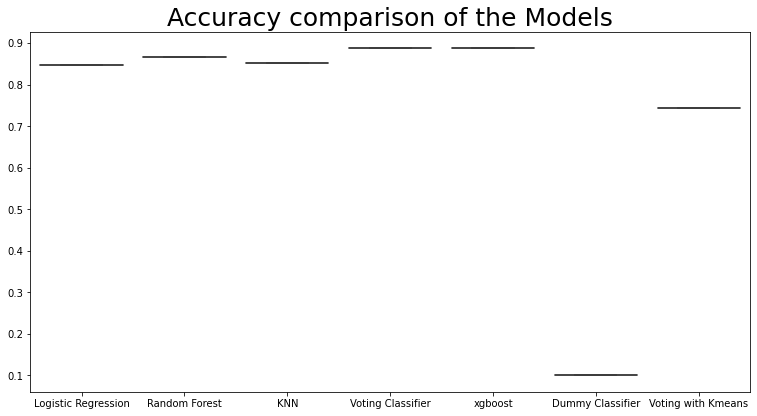

In [63]:
Models = ["Logistic Regression","Random Forest", "KNN", "Voting Classifier", "xgboost", "Dummy Classifier", "Voting with Kmeans"]
Accuracy = [0.8479, 0.8655, 0.8527, 0.8877, 0.8878, 0.1000, 0.7435]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = Accuracy
sns.boxplot(x=x, y=y)
plt.title("Accuracy comparison of the Models",fontsize=25)
plt.show

* ### The model with the highest accuracy is <u>Voting Classifier</u>, although the xgboost Classifier is not far from it.
* ### Since the Voting Classifier is an ensemble model, I prefer to use it over an xgboost Classifier that is close to it in accuracy, as it has more viewing angles of the data and that makes it more reliable and powerful
* ### It should be noted that due to the use of the course-validation at all the models, i significantly reduce the fear of over-fitting

# <u>Test the model on data test</u>

In [52]:
#------------Separate feature data and target data of the data test--------------
y_test = data_test['label']
X_test = data_test.drop("label",axis=1)
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
pipe_VOT = Pipeline([
     ("pca", PCA(n_components=120, random_state=42)),
    ("scale", StandardScaler()),
     ('voting_clf', VotingClassifier(
        estimators=[
            ('lg', LogisticRegression(multi_class='ovr',max_iter=100000)),
            ('rf', RandomForestClassifier()),
            ('xgb', XGBClassifier(n_estimators=300, seed=0, eval_metric='mlogloss')),
             ('knn', KNeighborsClassifier(n_neighbors=4))
        ], voting='soft', n_jobs=-1))
])



pipe_VOT.fit(X_train, y_train)
y_pred = pipe_VOT.predict(X_test)

print(classification_report(y_test, y_pred,
                                digits=4, target_names=classes))
#save the accuracy
accuracy_VOT_Test = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

 T-shirt/top     0.8208    0.8700    0.8447      1000
     Trouser     0.9929    0.9760    0.9844      1000
    Pullover     0.8356    0.8130    0.8241      1000
       Dress     0.9110    0.9210    0.9160      1000
        Coat     0.8317    0.8650    0.8480      1000
      Sandal     0.9750    0.9350    0.9546      1000
       Shirt     0.7309    0.6710    0.6997      1000
     Sneaker     0.9306    0.9390    0.9348      1000
         Bag     0.9654    0.9780    0.9717      1000
  Ankle boot     0.9371    0.9690    0.9528      1000

    accuracy                         0.8937     10000
   macro avg     0.8931    0.8937    0.8931     10000
weighted avg     0.8931    0.8937    0.8931     10000



* ### Plot Confusion matrix of the test of the best model:

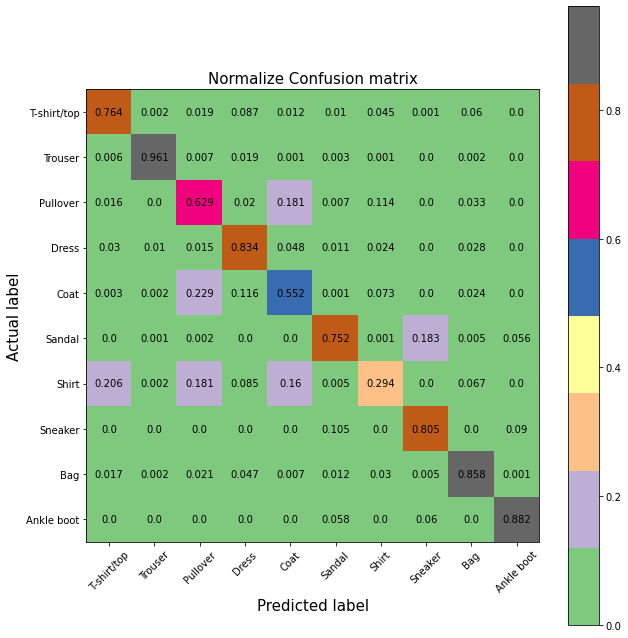

In [65]:
#----------------------Normalize Confusion matrix------------------------------------

cm = confusion_matrix(y_test, y_pred,normalize='true')
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Accent')#GnBu
plt.title('Normalize Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## <u>conclusion:</u>
* ### The model chosen is Voting Classifier using PCA to reduce the dimensions from <u>784</u> to <u>120</u> dimensions.
* ### We reached a <u>89.37%</u> of accuracy on the data test and this is a high result without the use of neural networks.
* ### It should be noted that the fact that the accuracy did not decrease much in the transition between the data train and the data test gives us another measure that we did not got over-fitting (in addition to cross validation).